Final value with continuous fees: 1,644,305.67 CZK
Final value with prepaid fees: 1,659,714.96 CZK

Difference in future values (present value): 7,667.60 CZK


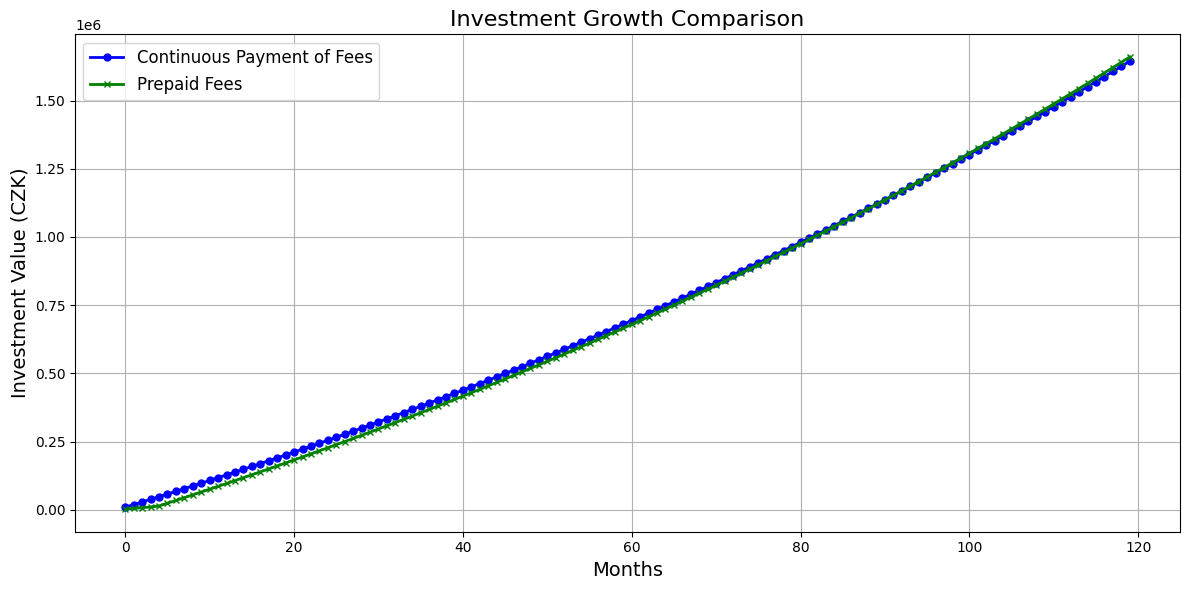

In [1]:
# Import the matplotlib library for plotting graphs.
import matplotlib.pyplot as plt

# Define key investment parameters.
duration_months = 120  # Total duration of investment in months.
monthly_investment = 10000  # Amount invested each month.
fee_continuous = 0.05  # Fee for continuous payment method (5%).
fee_prepaid = 0.03     # Fee for prepaid payment method (3%).
prepaid_fee_fraction = 0.75  # Fraction of monthly investment deducted for prepaid fees (75%).
annual_return_rate = 0.07    # Annual rate of return on investment (7%).

# Initialize lists to store the growth of investment over time for both payment methods.
# The first month's investment is adjusted for the initial fees.
continuous_growth = [monthly_investment * (1 - fee_continuous)]
prepaid_growth = [monthly_investment * (1 - prepaid_fee_fraction)]
prepaid_fees = [monthly_investment * prepaid_fee_fraction]
total_prepaid_fees = fee_prepaid * duration_months * monthly_investment  # Total fees for the prepaid method.

# Loop through each month of the investment period.
for month in range(1, duration_months):
    monthly_return_factor = 1 + annual_return_rate / 12  # Monthly interest factor.

    # Calculate the growth for continuous fee payment.
    # It includes the previous amount plus new investment minus the fee.
    continuous_growth.append(continuous_growth[-1] * monthly_return_factor + monthly_investment * (1 - fee_continuous))

    # Calculate additional prepaid fee for the current month.
    additional_prepaid_fee = min(monthly_investment * prepaid_fee_fraction, total_prepaid_fees - sum(prepaid_fees))
    
    # Calculate the growth for prepaid fee payment.
    prepaid_growth.append(prepaid_growth[-1] * monthly_return_factor + monthly_investment - additional_prepaid_fee)
    
    # Add the calculated fee to the list of prepaid fees.
    prepaid_fees.append(additional_prepaid_fee)

# Calculate the present value of the future difference between the two methods.
present_value_diff = abs(continuous_growth[-1] - prepaid_growth[-1]) / ((1 + annual_return_rate / 12) ** duration_months)

# Print the final values of the investment for both methods and their present value difference.
print(f"Final value with continuous fees: {continuous_growth[-1]:,.2f} CZK")
print(f"Final value with prepaid fees: {prepaid_growth[-1]:,.2f} CZK\n")
print(f"Difference in future values (present value): {present_value_diff:,.2f} CZK")

# Set up the plot for visual comparison of investment growth.
plt.figure(figsize=(12, 6))  # Set the size of the plot.
# Plot the continuous and prepaid growth curves.
plt.plot(continuous_growth, label='Continuous Payment of Fees', color='blue', linewidth=2, marker='o', markersize=5)
plt.plot(prepaid_growth, label='Prepaid Fees', color='green', linewidth=2, marker='x', markersize=5)

# Set the title and labels of the plot.
plt.title("Investment Growth Comparison", fontsize=16)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Investment Value (CZK)", fontsize=14)

# Add a legend and grid to the plot for clarity.
plt.legend(fontsize=12)
plt.grid(True)

# Adjust the layout for a neat appearance.
plt.tight_layout()

# Display the plot.
plt.show()
